In [1]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [2]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [3]:
NOTEBOOK_NAME = 'similarity_matrix_combined_vhpc'

In [4]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

Unable to restore variable 'load_all_animals_vars', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)


In [5]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing', session='',
                          func=lambda x: x):
    all_of_them = {}
    for ani in animal_list:
        try:
            folder = '../%s/%s/notebooks/autorestore/%s/' % (ani, session, notebook)
            all_of_them.update({ani: func(ut.load_variable(varname, folder))})
        except IOError:
            print "Nope: %s, %s, %s" % (ani, session, varname)
    return all_of_them

In [6]:
all_animals =     'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
d2_animals =      'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8',       '91', '92', '93'
pre_animals =     'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
post_animals =    'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93','91b','92b','93b'
pre_rev_animals = 'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
post_rev_animals ='c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93','91b','92b','93b'
catch_animals =   'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'

In [7]:
sessions = 'pre','d2','post','pre_rev','post_rev','catch'

In [8]:
for sess in sessions:
    for dur in 1,: #use 5 for 0.5sec, 1 for 1 sec and 2 for 2sec
        exec("patterns_tb_%s = dict(zip(%s_animals, [ut.load_variable('patterns_tb_%s_%s',\
                                                           '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                  for ani in %s_animals]))"%(sess,sess,sess,dur,sess))
        exec("labels_%s = dict(zip(%s_animals, [ut.load_variable('labels_%s',\
                                                         '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                  for ani in %s_animals]))"%(sess,sess,sess,sess))
        if sess == 'catch':
            exec("labels_catch_nd = dict(zip(%s_animals, [ut.load_variable('labels_%s_nd',\
                                                         '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                  for ani in %s_animals]))"%(sess,sess,sess))

#### labels: CS- = 0, Rew = 1, Shock = 2, rw_catch = -1, sh_catch = -2

## compare similarity across time bins (tb)

In [9]:
#combine cells and patterns across animals
for sess in sessions[:-1]:
    #exec("combined_labels_%s=[]"%sess)
    #for ani in eval("%s_animals"%sess):
    #    exec("combined_labels_%s.extend(np.where(labels_%s[ani]==0))"%(sess,sess))
    #    num_trials = len(eval("patterns_tb_%s[ani][0]"%sess))
    for tb in range(14):
        for odor,trial in zip(['CSm','rew','sh'],[0,1,2]):
            exec("combined_patterns_tb_%s_%s_%s=[]"%(tb,sess,odor))
            exec("combined_patterns_tb_%s_%s_%s = np.concatenate(([patterns_tb_%s[ani][tb][labels_%s[ani]==trial]\
                  for ani in %s_animals]),axis=1)"%(tb,sess,odor,sess,sess,sess))


In [10]:
#combine cells and patterns across animals
for sess in ['catch']:
    for tb in range(14):
        for odor,trial in zip(['CSm','rew','sh','rwnd','shnd'],[0,1,2,-1,-2]):
            exec("combined_patterns_tb_%s_%s_%s=[]"%(tb,sess,odor))
            exec("combined_patterns_tb_%s_%s_%s = np.concatenate(([patterns_tb_%s[ani][tb][labels_%s[ani]==trial]\
                  for ani in %s_animals]),axis=1)"%(tb,sess,odor,sess,sess,sess))

In [18]:
#this will get correlations for each animal individually
odors= 'CSm','rew','sh'
odors_catch = 'CSm','rew','sh','rwnd','shnd'

tbs = range(14)
pattern_ids_pre =  ['tb%s_%s_pre'%(tb,odor) for tb, odor in product(tbs, odors)]
pattern_ids_d2 =  ['tb%s_%s_d2'%(tb,odor) for tb, odor in product(tbs, odors)]
pattern_ids_post = ['tb%s_%s_post'%(tb,odor) for tb, odor in product(tbs, odors)]
pattern_ids_pre_rev = ['tb%s_%s_pre_rev'%(tb,odor) for tb, odor in product(tbs, odors)]
pattern_ids_post_rev = ['tb%s_%s_post_rev'%(tb,odor) for tb, odor in product(tbs, odors)]
pattern_ids_catch =['tb%s_%s_catch'%(tb,odor) for tb, odor in product(tbs, odors_catch)]

all_patterns_pre = [eval('combined_patterns_tb_%s_pre_%s'%(tb,odor)) for tb,odor in product(tbs,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_pre, all_patterns_pre)
across_tb_res_pre=corrmat_distr
print 'pre DONE!',

all_patterns_d2 = [eval('combined_patterns_tb_%s_d2_%s'%(tb,odor)) for tb,odor in product(tbs,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_d2, all_patterns_d2)
across_tb_res_d2=corrmat_distr
print 'd2 DONE!',

all_patterns_post = [eval('combined_patterns_tb_%s_post_%s'%(tb,odor)) for tb,odor in product(tbs,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_post, all_patterns_post)
across_tb_res_post=corrmat_distr
print 'post DONE!',

all_patterns_pre_rev = [eval('combined_patterns_tb_%s_pre_rev_%s'%(tb,odor)) for tb,odor in product(tbs,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_pre_rev, all_patterns_pre_rev)
across_tb_res_pre_rev=corrmat_distr
print 'pre_rev DONE!',

all_patterns_post_rev = [eval('combined_patterns_tb_%s_post_rev_%s'%(tb,odor)) for tb,odor in product(tbs,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_post_rev, all_patterns_post_rev)
across_tb_res_post_rev=corrmat_distr
print 'post_rev DONE!',

all_patterns_catch = [eval('combined_patterns_tb_%s_catch_%s'%(tb,odor)) for tb,odor in product(tbs,odors_catch)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_catch, all_patterns_catch)
across_tb_res_catch=corrmat_distr
print 'catch DONE!',
    
#across_tb_res_renew = {}
#for ani in patterns_tb_renew.keys():
#    all_patterns_renew = [eval('patterns_tb_%s_renew_%s[ani]'%(tb,odor)) for tb,odor in product(tbs,odors)]
#    corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_renew, all_patterns_renew)
#    across_tb_res_renew[ani]=corrmat_distr
#    print 'renew',ani,'DONE!',


d2 DONE!


In [16]:
np.mean(across_tb_res_pre['tb10_CSm_pre', 'tb10_CSm_pre'])

0.033856668983552225

In [19]:
#make matrix of all comparisons across tbs, but within a trial type
i=-1
for tb1 in range(14):
    i=i+1
    j=-1
    for sess in sessions[:-1]:
        for trial in ['CSm','rew','sh']:
            exec("matrix_%s_%s_%s = []"%(sess,trial,i))
            exec("matrix_%s_%s_%s_all = []"%(sess,trial,i))
            for tb2 in range(14):
                j=j+1
                #get mean values across all animals
                eval("matrix_%s_%s_%s"%(sess,trial,i)).insert(j,eval("np.mean(across_tb_res_%s['tb%s_%s_%s','tb%s_%s_%s'])\
                    "%(sess,tb1,trial,sess,tb2,trial,sess,)))
                eval("matrix_%s_%s_%s_all"%(sess,trial,i)).insert(j,eval("across_tb_res_%s['tb%s_%s_%s','tb%s_%s_%s']\
                    "%(sess,tb1,trial,sess,tb2,trial,sess,)))

In [20]:
#make catch session matrix of all comparisons across tbs, but within a trial type
i=-1
for tb1 in range(14):
    i=i+1
    j=-1
    for sess in ['catch']:
        for trial in ['CSm','rew','sh','rwnd','shnd']:
            exec("matrix_%s_%s_%s = []"%(sess,trial,i))
            exec("matrix_%s_%s_%s_all = []"%(sess,trial,i))
            for tb2 in range(14):
                j=j+1
                #get mean values across all animals
                eval("matrix_%s_%s_%s"%(sess,trial,i)).insert(j,eval("np.mean(across_tb_res_%s['tb%s_%s_%s','tb%s_%s_%s'])\
                    "%(sess,tb1,trial,sess,tb2,trial,sess,)))
                eval("matrix_%s_%s_%s_all"%(sess,trial,i)).insert(j,eval("across_tb_res_%s['tb%s_%s_%s','tb%s_%s_%s']\
                    "%(sess,tb1,trial,sess,tb2,trial,sess,)))

In [35]:
#all_labels='rwVSsh','rwVScsm','shVScsm','rwndVSshnd','rwVSrwnd','rwndVScsm','shVSshnd','shndVScsm'
#non_catch_labels = 'rwVSsh','rwVScsm','shVScsm'
#catch_labels = 'rwndVSshnd','rwVSrwnd','rwndVScsm','shVSshnd','shndVScsm'
all_comparisons = 'rewVSsh','rewVSCSm','shVSCSm','rwndVSshnd','rewVSrwnd','rwndVSCSm','shVSshnd','shndVSCSm'

In [31]:
#make matrix of all cross-trial-type comparisons across tbs
i=-1
for tb1 in range(14):
    i=i+1
    j=-1
    for sess in sessions:
        for comp in all_comparisons[:3]:   # don't use the catch trial comparisons here
            exec("matrix_%s_%s_%s = []"%(sess,comp,i))
            exec("matrix_%s_%s_%s_all = []"%(sess,comp,i))
            for tb2 in range(14):
                j=j+1
                #get mean values across all animals
                eval("matrix_%s_%s_%s"%(sess,comp,i)).insert(j,eval("np.mean(across_tb_res_%s['tb%s_%s_%s','tb%s_%s_%s'])\
                    "%(sess,tb1,comp.split('VS')[0],sess,tb2,comp.split('VS')[1],sess,)))
                eval("matrix_%s_%s_%s_all"%(sess,comp,i)).insert(j,eval("across_tb_res_%s['tb%s_%s_%s','tb%s_%s_%s']\
                    "%(sess,tb1,comp.split('VS')[0],sess,tb2,comp.split('VS')[1],sess,)))

In [36]:
#make catch matrix of all cross-trial-type comparisons across tbs
i=-1
for tb1 in range(14):
    i=i+1
    j=-1
    for sess in ['catch']:
        for comp in all_comparisons:   # do use the catch trial comparisons here
            exec("matrix_%s_%s_%s = []"%(sess,comp,i))
            exec("matrix_%s_%s_%s_all = []"%(sess,comp,i))
            for tb2 in range(14):
                j=j+1
                #get mean values across all animals
                eval("matrix_%s_%s_%s"%(sess,comp,i)).insert(j,eval("np.mean(across_tb_res_%s['tb%s_%s_%s','tb%s_%s_%s'])\
                    "%(sess,tb1,comp.split('VS')[0],sess,tb2,comp.split('VS')[1],sess,)))
                eval("matrix_%s_%s_%s_all"%(sess,comp,i)).insert(j,eval("across_tb_res_%s['tb%s_%s_%s','tb%s_%s_%s']\
                    "%(sess,tb1,comp.split('VS')[0],sess,tb2,comp.split('VS')[1],sess,)))

In [40]:
#get standard deviation and standard error for individual and trial vs trial comparisons
import math

for tb in range(14):
    for sess in sessions[:-1]:
        for trial in ['CSm','rew','sh']:
            exec("matrix_%s_%s_%s_std = []"%(sess,trial,tb))
            exec("matrix_%s_%s_%s_err = []"%(sess,trial,tb))
            for x in range(len(eval("matrix_%s_%s_%s_all"%(sess,trial,tb)))):
                exec("matrix_%s_%s_%s_std.append(np.std(matrix_%s_%s_%s_all[x]))"%(sess,trial,tb,sess,trial,tb))
                exec("matrix_%s_%s_%s_err.append(np.std(matrix_%s_%s_%s_all[x])/(math.sqrt(len(matrix_%s_%s_%s_all[x]))))"%(sess,trial,tb,sess,trial,tb,sess,trial,tb))
        for comp in all_comparisons[:3]:
            exec("matrix_%s_%s_%s_std = []"%(sess,comp,tb))
            exec("matrix_%s_%s_%s_err = []"%(sess,comp,tb))
            for x in range(len(eval("matrix_%s_%s_%s_all"%(sess,comp,tb)))):
                    exec("matrix_%s_%s_%s_std.append(np.std(matrix_%s_%s_%s_all[x]))"%(sess,comp,tb,sess,comp,tb))
                    exec("matrix_%s_%s_%s_err.append(np.std(matrix_%s_%s_%s_all[x])/(math.sqrt(len(matrix_%s_%s_%s_all[x]))))"%(sess,comp,tb,sess,comp,tb,sess,comp,tb))

In [41]:
#get standard deviation and standard error for individual and trial vs trial comparisons
import math

for tb in range(14):
    for sess in ['catch']:
        for trial in ['CSm','rew','sh','rwnd','shnd']:
            exec("matrix_%s_%s_%s_std = []"%(sess,trial,tb))
            exec("matrix_%s_%s_%s_err = []"%(sess,trial,tb))
            for x in range(len(eval("matrix_%s_%s_%s_all"%(sess,trial,tb)))):
                exec("matrix_%s_%s_%s_std.append(np.std(matrix_%s_%s_%s_all[x]))"%(sess,trial,tb,sess,trial,tb))
                exec("matrix_%s_%s_%s_err.append(np.std(matrix_%s_%s_%s_all[x])/(math.sqrt(len(matrix_%s_%s_%s_all[x]))))"%(sess,trial,tb,sess,trial,tb,sess,trial,tb))
        for comp in all_comparisons:
            exec("matrix_%s_%s_%s_std = []"%(sess,comp,tb))
            exec("matrix_%s_%s_%s_err = []"%(sess,comp,tb))
            for x in range(len(eval("matrix_%s_%s_%s_all"%(sess,comp,tb)))):
                    exec("matrix_%s_%s_%s_std.append(np.std(matrix_%s_%s_%s_all[x]))"%(sess,comp,tb,sess,comp,tb))
                    exec("matrix_%s_%s_%s_err.append(np.std(matrix_%s_%s_%s_all[x])/(math.sqrt(len(matrix_%s_%s_%s_all[x]))))"%(sess,comp,tb,sess,comp,tb,sess,comp,tb))

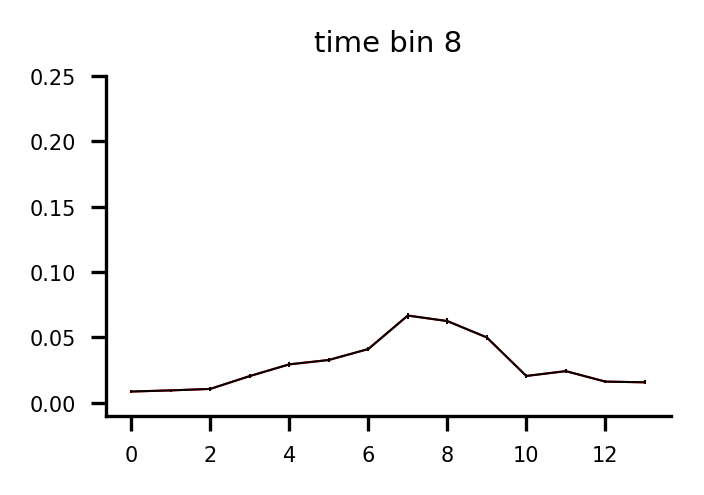

In [47]:
pl.plot(matrix_post_rew_8,color='r')
pl.errorbar(range(14),matrix_post_rew_8,yerr=matrix_post_rew_8_err,color='k')
pl.ylim(-.01,.25)
pl.title("time bin 8")

In [48]:
for sess in sessions[:-1]:
    for trial in ['CSm','rew','sh','rewVSsh','rewVSCSm','shVSCSm']:
        exec("big_matrix_%s_%s = []"%(sess,trial))
        for tb in range(14):
            eval("big_matrix_%s_%s"%(sess,trial)).append(eval("matrix_%s_%s_%s"%(sess,trial,tb)))

In [49]:
for sess in ['catch']:
    for trial in ['CSm','rew','sh','rwnd','shnd','rewVSsh','rewVSCSm','shVSCSm','rwndVSshnd','rewVSrwnd','rwndVSCSm','shVSshnd','shndVSCSm']:
        exec("big_matrix_%s_%s = []"%(sess,trial))
        for tb in range(14):
            eval("big_matrix_%s_%s"%(sess,trial)).append(eval("matrix_%s_%s_%s"%(sess,trial,tb)))

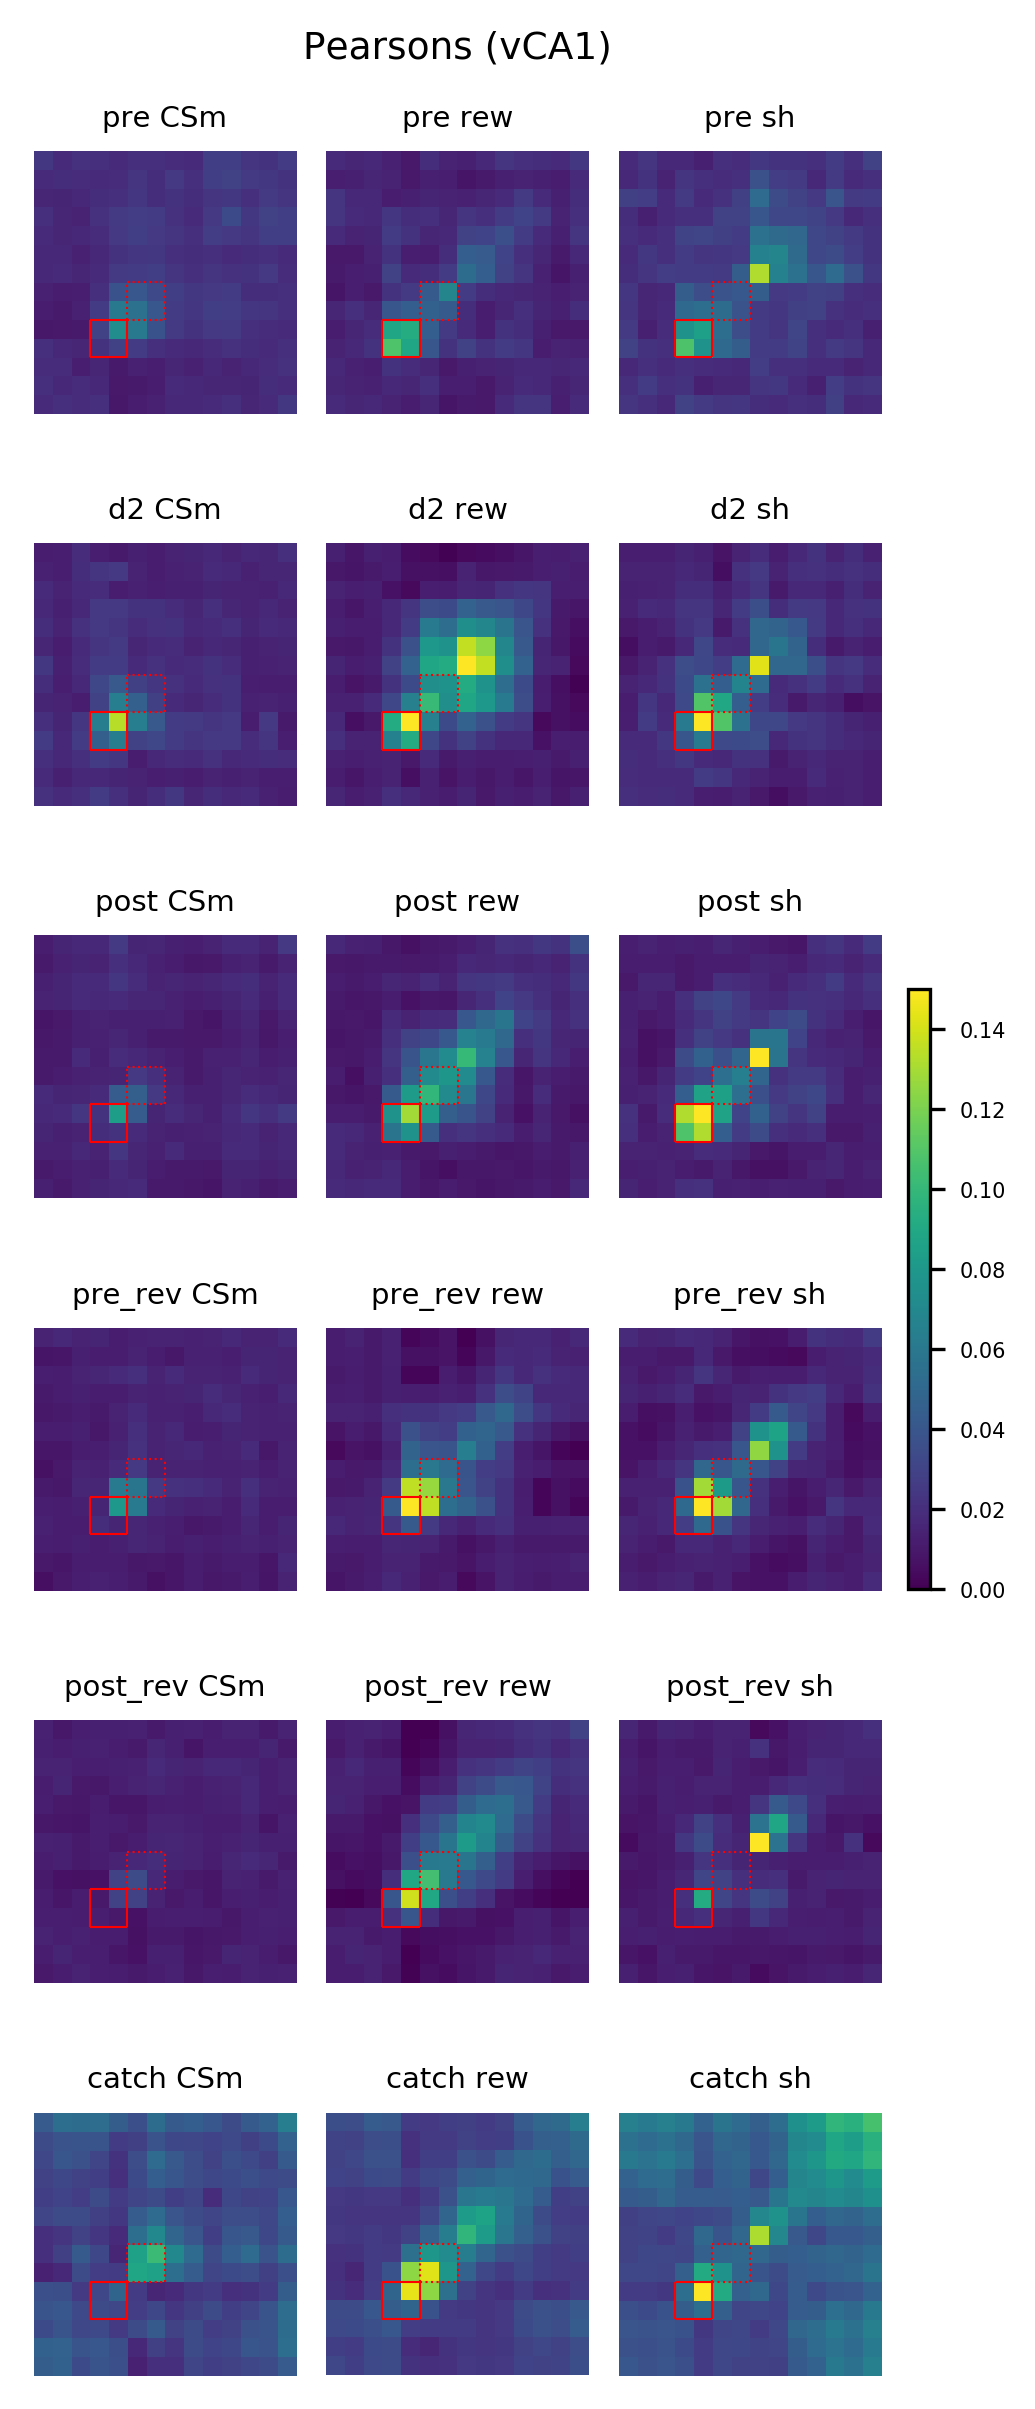

In [72]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(6,3,figsize=(3,8))
for sess,r in zip(sessions,range(len(sessions))):
    for trial,c in zip(['CSm','rew','sh'],[0,1,2]):
        im=axs[r][c].imshow(eval("big_matrix_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=-0, vmax=0.15)
        axs[r][c].set_title(sess+" "+trial,fontsize=7)
        axs[r][c].vlines(2.5,2.5,4.5,color='r')
        axs[r][c].hlines(2.5,2.5,4.5,color='r')
        axs[r][c].vlines(4.5,2.5,4.5,color='r')
        axs[r][c].hlines(4.5,2.5,4.5,color='r')
        axs[r][c].vlines(4.5,4.5,6.5,color='r',linestyle=':')
        axs[r][c].hlines(4.5,4.5,6.5,color='r',linestyle=':')
        axs[r][c].vlines(6.5,4.5,6.5,color='r',linestyle=':')
        axs[r][c].hlines(6.5,4.5,6.5,color='r',linestyle=':')
        pt.remove_axes(axs[r][c])
pl.suptitle('Pearsons (vCA1)',y=1.01,fontsize=9)
cax = fig.add_axes([1, 0.36, 0.025, 0.25])
pl.colorbar(im,cax=cax)

fig.tight_layout()
#fig.savefig("../img/%s.jpg"%NOTEBOOK_NAME)

/home/fabios/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


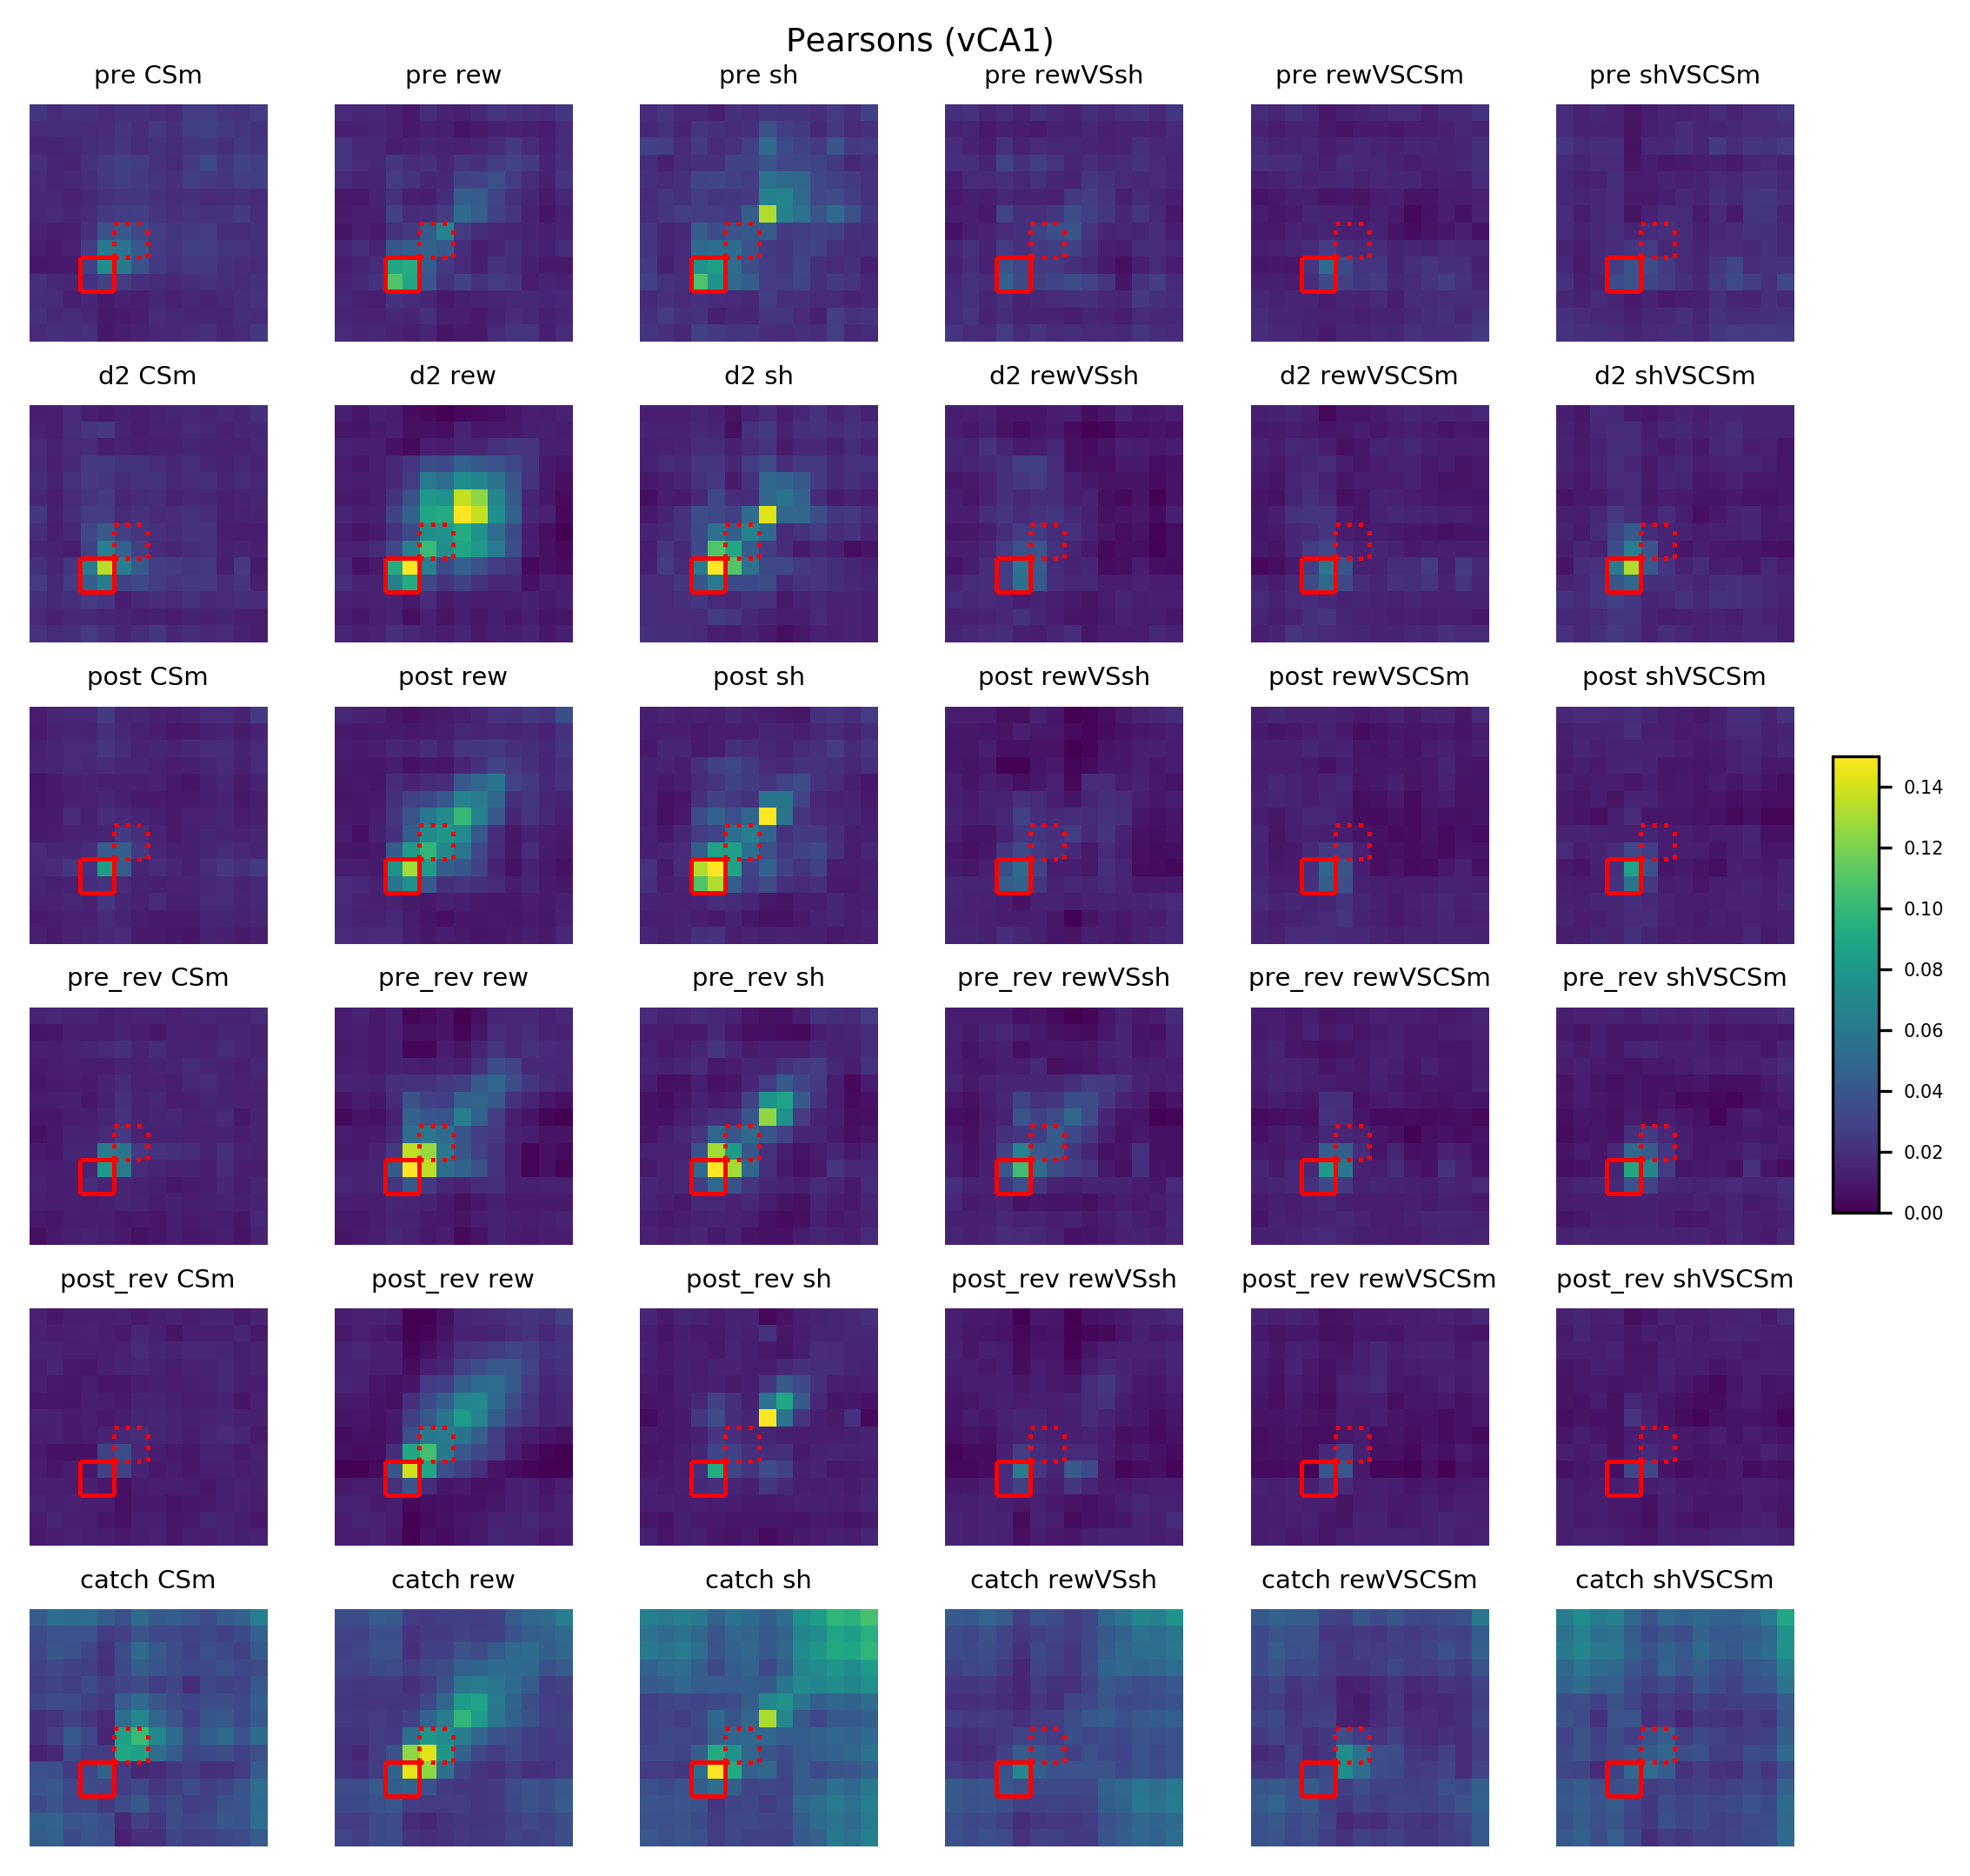

In [5]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(6,6,figsize=(7,7))
for sess,r in zip(sessions,range(len(sessions))):
    for trial,c in zip(['CSm','rew','sh','rewVSsh','rewVSCSm','shVSCSm'],[0,1,2,3,4,5]):
        im=axs[r][c].imshow(eval("big_matrix_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=-0, vmax=0.15)
        axs[r][c].set_title(sess+" "+trial,fontsize=7)
        axs[r][c].vlines(2.5,2.5,4.5,color='r',lw=1.2)
        axs[r][c].hlines(2.5,2.5,4.5,color='r',lw=1.2)
        axs[r][c].vlines(4.5,2.5,4.5,color='r',lw=1.2)
        axs[r][c].hlines(4.5,2.5,4.5,color='r',lw=1.2)
        axs[r][c].vlines(4.5,4.5,6.5,color='r',lw=1.2,linestyle=':')
        axs[r][c].hlines(4.5,4.5,6.5,color='r',lw=1.2,linestyle=':')
        axs[r][c].vlines(6.5,4.5,6.5,color='r',lw=1.2,linestyle=':')
        axs[r][c].hlines(6.5,4.5,6.5,color='r',lw=1.2,linestyle=':')
        pt.remove_axes(axs[r][c])
pl.suptitle('Pearsons (vCA1)',y=1.01,fontsize=9)
cax = fig.add_axes([1, 0.36, 0.025, 0.25])
pl.colorbar(im,cax=cax)

fig.tight_layout()
fig.savefig("../figures/%s.pdf"%NOTEBOOK_NAME)

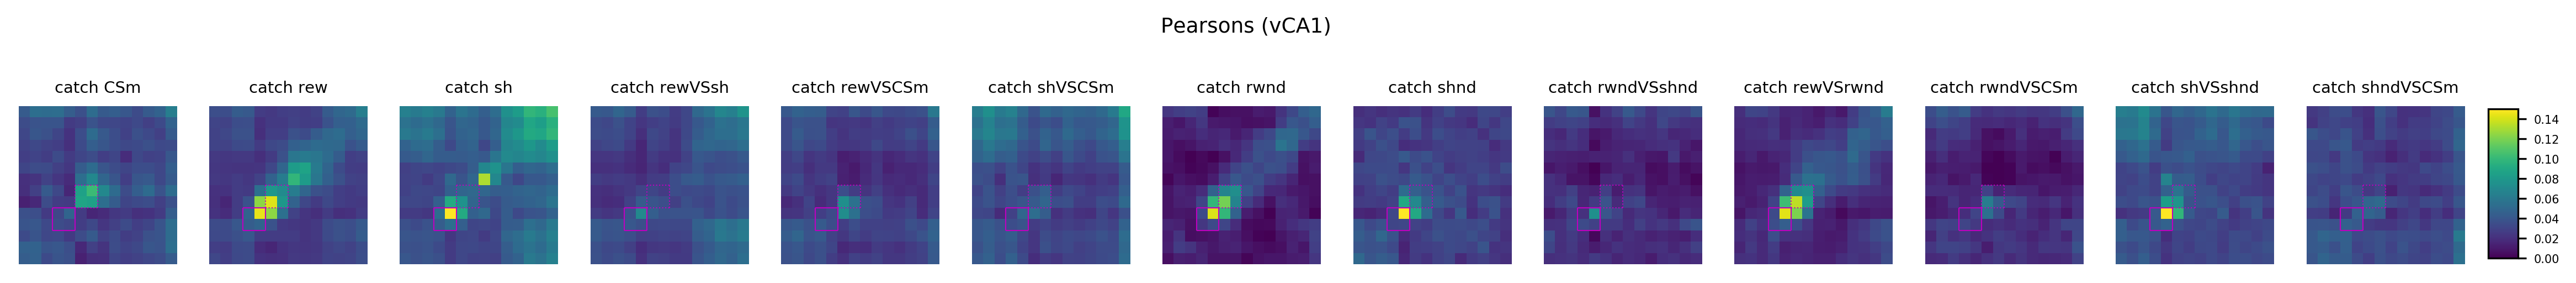

In [6]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(1,13,figsize=(15,2))
for sess in ['catch']:
    for trial,c in zip(['CSm','rew','sh','rewVSsh','rewVSCSm','shVSCSm','rwnd','shnd','rwndVSshnd','rewVSrwnd',
                        'rwndVSCSm','shVSshnd','shndVSCSm'],[0,1,2,3,4,5,6,7,8,9,10,11,12]):
        im=axs[c].imshow(eval("big_matrix_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=-0, vmax=0.15)
        axs[c].set_title(sess+" "+trial,fontsize=7)
        axs[c].vlines(2.5,2.5,4.5,color='m')
        axs[c].hlines(2.5,2.5,4.5,color='m')
        axs[c].vlines(4.5,2.5,4.5,color='m')
        axs[c].hlines(4.5,2.5,4.5,color='m')
        axs[c].vlines(4.5,4.5,6.5,color='m',linestyle=':')
        axs[c].hlines(4.5,4.5,6.5,color='m',linestyle=':')
        axs[c].vlines(6.5,4.5,6.5,color='m',linestyle=':')
        axs[c].hlines(6.5,4.5,6.5,color='m',linestyle=':')
        pt.remove_axes(axs[c])
pl.suptitle('Pearsons (vCA1)',y=1.01,fontsize=9)
cax = fig.add_axes([1, 0.28, 0.012, 0.45])
pl.colorbar(im,cax=cax)

fig.tight_layout()
fig.savefig("../figures/%s_catch.pdf"%NOTEBOOK_NAME)

In [ ]:
#import seaborn as sns
#%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')
#
#fig, ax = pl.subplots(1, 1, figsize=(4, 2))
#
#pairs_to_plot = [('tb14_CSp_expo', 'tb14_CSp_expo'),
#                 ('tb14_CSp_expo', 'tb15_CSp_expo'),
#                 ('tb14_CSp_expo', 'tb1_CSp_expo'),
#                 ('tb14_CSm_expo', 'tb14_CSm_expo'),
#                 ('tb14_CSm_expo', 'tb15_CSm_expo'),
#                 ('tb14_CSm_expo', 'tb1_CSm_expo')]
#values = [across_tb_res_expo[p] for p in pairs_to_plot]
#avg_values = [np.mean(across_tb_res_expo[p]) for p in pairs_to_plot]
##seaborn for individual points with jitter
#sns.set(style="white", color_codes=False)
#sns.stripplot(data=values,jitter=True,edgecolor=None,size=2,alpha=.5)
#sns.despine()
#
##colors = np.repeat(['b', 'r', 'silver', 'grey', 'y'], len(values)/5).tolist()
## pt.plot_violins(values, ax=ax, colors=colors)
##positions = range(len(values))
##[ax.plot([p]*len(v), v, 'o', mew=0, ms=2, color=c, alpha=0.5, zorder=0) for p, v, c in zip(positions, values, colors)]
#
#pt.plot_bars(values, ax=ax, stderr=True)
##pl.bar(range(len(avg_values)),avg_values)
## [b.set_color(c) for b, c in zip(bp['boxes'], colors)]
## [b.set_color(c) for b, c in zip(bp['whiskers'], np.repeat(colors, 2))]
## [b.set_color(c) for b, c in zip(bp['caps'], np.repeat(colors, 2))]
#
#ax.set_xticks(range(len(values)))
#ax.set_xticklabels(['%s\n%s'%(p[0][2:8], p[1][2:8]) for p in pairs_to_plot], fontsize=5)
##ax.set_xlabel('Pre       Post               Ext1               Ext2           Renew', fontsize=7)
##ax.set_ylim(-0.05, 0.5)
#ax.set_ylabel("Pattern similarity")
#pt.nicer_plot(ax)
#
#fig.tight_layout()
#
#ax.set_title('Pearsons correlation')
##fig.savefig("../img/similarity_CSp_dhpc_JSB.jpg")

In [88]:
save_workspace(db)

Could not store variable 'math'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'sys'. Skipping...
